# ES 3

In [1]:
import glob
import os
import math
import cmath
import matplotlib.pyplot      as plt
import numpy                  as np
import scipy.constants        as sc
import scipy.integrate        as spi
os.makedirs('./conservative_burgers')
os.makedirs('./nonconservative_burgers')

In [2]:
conservative = []
non_conservative = []
x_c = []

In [3]:
#constant variable 

J = 101 # number of points in space lattice (resolution)
a = 1. # velocity
cf = 0.5  #curan factor
x_max = 10. # maximum value of spatial lattice
x_min = 0. # minimum value of spatial lattice

# Global variable

dx = (x_max - x_min)/(J-1) # lattice step
# dt = cf * dx / (abs(a)) # time step
x = np.linspace(x_min , x_max, J) #generate the space lattice
u = np.zeros(J) # initializing function
u_ret = np.zeros(J) # functiona at step n-1


In [4]:
# Functions
def L2norm():
    '''
       return to L2 discrete norm of a function
    '''
    global u
    norm = np.sum(abs(u)**2)* dx
    return norm 

def setGaussian(sigma, x_0) :
    '''
        sigma and x_0 has to be a number between 0 and 1
        function gives a gaussian at t = 0
    '''
    global u 
    sigma = sigma * (x_max - x_min)
    x_0 = x_0 * (x_max - x_min)
    #u = (2/(np.pi*sigma**2))**0.25 * np.exp(- ((x - x_0)**2/(sigma**2)))
    u = 10 * np.exp(- ((x - x_0)**2))
    return u

def setStep(l, center) :
    global u 
    l = l * (x_max - x_min)
    center = center * (x_max - x_min)
    for i in range (J):
        if x[i] < center - l/2 or x[i] > center + l/2:
            u[i] = 0.
        else:
            u[i] = 1./np.sqrt(l)
            
def evolve_conservative() :
    global u
    u_next = np.zeros(J)
    for j in range (len(u)):
        u_next[j] = u[j] -  dt / dx * (0.5* u[j%len(u)]**2 -  0.5*u[(j-1)%len(u)]**2)
    u = u_next
    return u
def evolve_noncons() :
    global u
    u_next = np.zeros(J)
    for j in range (len(u)):
        u_next[j] = u[j] -  dt / dx * u[j%len(u)]*( u[j%len(u)] -  u[(j-1)%len(u)])
    u = u_next
    return u

# Conservative

In [5]:
directory = "./conservative_burgers/"
time = 0.5
t = 0
norm = []
setGaussian(0.05, 0.5)
dt = cf * dx / np.max(u)
i  = 0
while t <= time :
    plt.ylim(0,10)
    plt.plot(x,u)
    plt.savefig('./conservative_burgers/images_'+str(i).zfill(5)+'.png', dpi = 720)
    norm.append(L2norm())
    evolve_conservative()
    plt.close()
    t = t + dt
    i = i +1 
conservative.append(u)
x_c.append(x)

In [8]:
directory = "./conservative_burgers/"
files = os.listdir(directory)
files=sorted(files)
import imageio
import imageio.v2 as imageio
with imageio.get_writer('./burgers_conservative.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./conservative_burgers/'+file)
        writer.append_data(image)
        
files=[]
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="50%" controls>
      <source src="./burgers_conservative.mp4" type="video/mp4">
</video></div>""")

ValueError: Could not find a backend to open `./burgers_conservative.mp4`` with iomode `wI`.
Based on the extension, the following plugins might add capable backends:
  FFMPEG:  pip install imageio[ffmpeg]
  pyav:  pip install imageio[pyav]

In [9]:
u_conservative = u

# Non conservative

In [10]:
directory = "./nonconservative_burgers/"
time = 0.5
t = 0
norm = []
setGaussian(0.05, 0.5)
dt = cf * dx / np.max(u)
while t < time :
    #plt.ylim(0,10.1)
    #plt.plot(x,u)
    #plt.savefig('./nonconservative_burgers/images_'+str(t).zfill(5)+'.png', dpi = 720)
    #norm.append(L2norm())
    evolve_noncons()
    #plt.close()
    t = t + dt

non_conservative.append(u)
x_c.append(x)

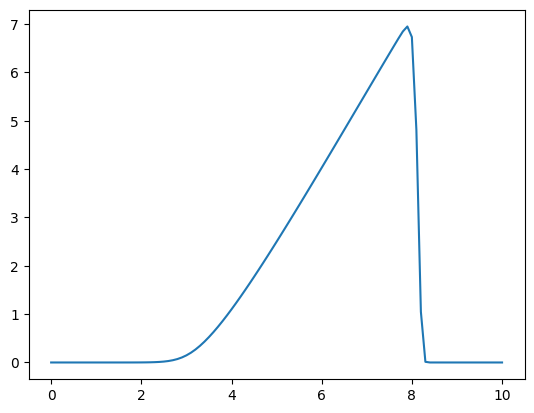

In [11]:
plt.plot(x_c[0], u_conservative, label = str(len(x_c[0]))+  ' conservative')
for i in range(len(non_conservative)-1):
    plt.plot(x_c[i],non_conservative[i], label = str(len(x_c[i]))+  ' non conservative')
    plt.ylim(0,10)
    plt.legend()
    plt.ylabel('u(x)')
    plt.xlabel('x')
plt.savefig('resolutions_nonconservative.eps', format= 'eps')

In [12]:
directory = "./nonconservative_burgers"
files = os.listdir(directory)
files=sorted(files)
import imageio
import imageio.v2 as imageio
with imageio.get_writer('./burgers_nonconservative.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./nonconservative_burgers/'+file)
        writer.append_data(image)
        
files=[]
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="50%" controls>
      <source src="./burgers_nonconservative.mp4" type="video/mp4">
</video></div>""")

ValueError: Could not find a backend to open `./burgers_nonconservative.mp4`` with iomode `wI`.
Based on the extension, the following plugins might add capable backends:
  FFMPEG:  pip install imageio[ffmpeg]
  pyav:  pip install imageio[pyav]

In [12]:
import shutil
shutil.rmtree('conservative_burgers')
shutil.rmtree('nonconservative_burgers')

[1]